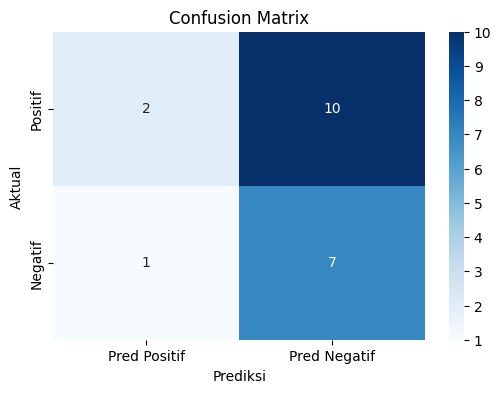

,precision,recall,f1-score,support
Negatif,0.41,0.88,0.56,8.00
Positif,0.67,0.17,0.27,12.00
accuracy,0.45,0.45,0.45,0.45
macro avg,0.54,0.52,0.41,20.00
weighted avg,0.56,0.45,0.38,20.00


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Daftar ulasan (50 positif + 50 negatif)
ulasan_positif = [
    'Produk sangat bagus', 'Pengiriman cepat', 'Kualitas memuaskan', 'Harga terjangkau',
    'Respon cepat dan ramah', 'Produk original', 'Puas dengan pelayanan', 'Barang sampai dengan utuh',
    'Recommended seller', 'Produk berfungsi baik', 'Warna sesuai gambar', 'Bahan berkualitas tinggi',
    'Mudah digunakan', 'Tidak ada cacat', 'Sesuai ekspektasi', 'Packing aman', 'Pelayanan memuaskan',
    'Produk awet', 'Desain menarik', 'Membantu aktivitas', 'Harga bersaing', 'Produk inovatif',
    'Ramah lingkungan', 'Belanja menyenangkan', 'Manfaat besar', 'Mudah dipasang', 'Produk efisien',
    'Nilai tambah', 'Produk stylish', 'Produk fungsional', 'Produk elegan', 'Produk dinamis',
    'Produk komprehensif', 'Produk praktis', 'Produk ekonomis', 'Produk efektif', 'Produk esensial',
    'Produk ideal', 'Produk optimal', 'Produk premium', 'Produk relevan', 'Produk superior',
    'Produk unik', 'Produk versatile', 'Produk vital', 'Produk worth it', 'Produk recommended',
    'Memuaskan hati', 'Menyenangkan', 'Cocok untuk hadiah'
]

ulasan_negatif = [
    'Tidak sesuai deskripsi', 'Pengiriman lambat', 'Kualitas buruk', 'Harga terlalu mahal',
    'Respon lambat, tidak ramah', 'Produk palsu', 'Tidak puas pelayanan', 'Barang cacat',
    'Tidak recommended', 'Tidak berfungsi dengan baik', 'Warna tidak sesuai', 'Bahan berkualitas rendah',
    'Sulit digunakan', 'Pengiriman mengecewakan', 'Ada cacat', 'Tidak sesuai ekspektasi',
    'Packing buruk, rusak', 'Pelayanan buruk', 'Produk cepat rusak', 'Desain kurang menarik',
    'Tidak membantu aktivitas', 'Harga tidak bersaing', 'Produk kurang inovatif',
    'Tidak ramah lingkungan', 'Pengalaman belanja buruk', 'Tidak memberikan manfaat besar',
    'Sulit dipasang', 'Produk tidak efisien', 'Tidak memberi nilai tambah', 'Produk tidak stylish',
    'Produk tidak fungsional', 'Produk tidak elegan', 'Produk tidak dinamis',
    'Produk tidak komprehensif', 'Produk tidak praktis', 'Produk tidak ekonomis',
    'Produk tidak efektif', 'Produk tidak esensial', 'Produk tidak ideal', 'Produk tidak optimal',
    'Produk tidak premium', 'Produk tidak relevan', 'Produk tidak superior', 'Produk tidak unik',
    'Produk tidak versatile', 'Produk tidak vital', 'Produk tidak worth it',
    'Produk tidak recommended', 'Tidak memuaskan hati', 'Tidak menyenangkan'
]

# Gabungkan ke dalam dataframe
data = pd.DataFrame({
    "teks": ulasan_positif + ulasan_negatif,
    "label": ["Positif"] * len(ulasan_positif) + ["Negatif"] * len(ulasan_negatif)
})

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    data["teks"], data["label"], test_size=0.2, random_state=42)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Latih model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = knn.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positif", "Negatif"])
cm_df = pd.DataFrame(cm, index=["Positif", "Negatif"], columns=["Pred Positif", "Pred Negatif"])

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Aktual")
plt.xlabel("Prediksi")
plt.show()

# Classification Report sebagai DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df.round(2))